In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [3]:
# Loading the dataset
titanic_dataset = pd.read_csv('..\\..\\Datasets\\Titanic.csv')
print(titanic_dataset.shape, '\n')
titanic_dataset.head()

(891, 12) 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Printing basic statistics of the dataset
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Printing info of the dataset
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

### 1. Handling Missing Values

In [6]:
# Checking for the missing values in the dataset
titanic_dataset.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Handling the missing values

# 1. Imputing 'Age' feature with its median
titanic_dataset.fillna({'Age' : titanic_dataset['Age'].median()}, inplace=True)

# 2. Dropping the 'Cabin' feature since it is mostly empty
titanic_dataset.drop('Cabin', axis=1, inplace=True)

# 3. Imputing 'Embarked' feature with its mode (since it is categorical)
titanic_dataset.fillna({'Embarked' : titanic_dataset['Embarked'].mode()[0]}, inplace=True)

In [8]:
# Checking the missing values after imputing the values
print('Missing values in the Dataset:', titanic_dataset.isnull().sum().sum())

Missing values in the Dataset: 0


<br>
<h3> 2. Feature Engineering </h3>

In [9]:
# Removing unnecessary features
titanic_dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Printing shape of dataset after removing features
titanic_dataset.shape

(891, 8)

<br>
<h3> 3. Encode Categorical Features </h3>

In [10]:
# Separating the categorical features
categorical_features = titanic_dataset.select_dtypes('object').columns
categorical_features

Index(['Sex', 'Embarked'], dtype='object')

In [11]:
# Encoding the categorical features 
encoder = LabelEncoder()

for feature in categorical_features:
    titanic_dataset[feature] = encoder.fit_transform(titanic_dataset[feature])

In [12]:
# Checking categories and datatype of categorical variables after encoding
for feature in categorical_features:
    print(feature, ': ', titanic_dataset[feature].nunique(), ': ', titanic_dataset[feature].unique(), ': ', titanic_dataset[feature].dtype)

Sex :  2 :  [1 0] :  int64
Embarked :  3 :  [2 0 1] :  int64


<br>
<h3> 4. Standardizing Numerical Features </h3>

In [13]:
# Standardizing the numerical features
scaler = StandardScaler()

titanic_dataset['Age'] = scaler.fit_transform(titanic_dataset[['Age']])
titanic_dataset['Fare'] = scaler.fit_transform(titanic_dataset[['Fare']])
# Since only these two features are numerical that should be scaled

In [14]:
# Checking mean and std of scaled features
titanic_dataset[['Age', 'Fare']].describe().round(2)

,Age,Fare
count,891.00,891.00
mean,0.00,0.00
std,1.00,1.00
min,-2.22,-0.65
25%,-0.57,-0.49
50%,-0.10,-0.36
75%,0.43,-0.02
max,3.89,9.67


<br>
<h3> 5. Balancing Imbalanced Data </h3>

Survived
0    549
1    342
Name: count, dtype: int64 




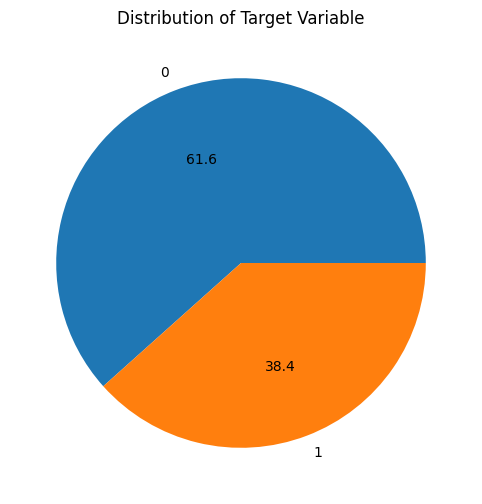

In [15]:
# Checking if the target variable is imbalanced
print(titanic_dataset['Survived'].value_counts(), '\n\n')

# Visualizing this distribution using pie chart
plt.figure(figsize=(10, 6))
plt.pie(titanic_dataset['Survived'].value_counts(), labels=titanic_dataset['Survived'].value_counts().index, autopct='%.1f')
plt.title('Distribution of Target Variable')
plt.show()


In [16]:
# Since the target variable is fairly imbalanced, we will balance it using SMOTE technique.
smote = SMOTE()

# Splitting the dataset before over sampling
X = titanic_dataset.drop('Survived', axis=1)
Y = titanic_dataset['Survived']

# Applying oversampling
X, Y = smote.fit_resample(X, Y)

In [17]:
# Checking the target variable is after balancing
print(Y.value_counts(), '\n\n')

Survived
0    549
1    549
Name: count, dtype: int64 




-> Now, the dataset has been preprocessed and is ready for model training.

<br><hr><br>
<h1>1. Evaluating Logistic Regression with Cross-Validation</h1>
<h3><b>Exercise:</b> Implement logistic regression and evaluate the model using k-fold cross-validation. <br>
Compare the cross-validation scores with a single train-test split evaluation.
</h3>

In [18]:
# Implementing logistic regression
lr_model = LogisticRegression()

# Evaluating the model using K-fold cross validation
cv_scores = cross_val_score(lr_model, X, Y, cv=10)

In [19]:
# Evaluating the model using single train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lr_model.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_test)
single_split_score = accuracy_score(Y_test, Y_pred)

In [20]:
# Comparing the cross vals score with single train test split score
print(f'10-Fold Cross Validation Score: {np.round(cv_scores, 3)}')
print(f'10-Fold Cross Validation Score Mean: {cv_scores.mean() : .3f}')
print(f'Single Split Score: {single_split_score : .3f}')

10-Fold Cross Validation Score: [0.782 0.745 0.855 0.736 0.718 0.791 0.827 0.836 0.835 0.771]
10-Fold Cross Validation Score Mean:  0.790
Single Split Score:  0.832


-> The 10-fold cross-validation score mean of 0.795 indicates consistent model performance across the different data subsets. The single split score of 0.809 is slightly higher but not significantly different, indicating that the model generalizes well. The cross-validation scores range (0.718 to 0.855) shows some variability with highest score being the third one, 0.855. 

-> Both the single split score and the 10-fold cross validation score doesn't differ so much indicating that model generalizes well even in single split.

<hr>

<br>
<h1>2. Analyzing Overfitting and Underfitting in Decision Trees</h1>
<h3><b>Exercise:</b> Train a decision tree classifier with varying depths to analyze overfitting and underfitting. <br>
Plot training and validation accuracies to visualize the effects.</h3>

In [21]:
# Declaring arrays for storing train and validation accuracies of decision trees with varying depths
train_accuracies = []
validation_accuracies = []
depths = range(1, 21)

# Training decision tree classifier with 20 differenct depths
for depth in depths:
    dtc_model = DecisionTreeClassifier(max_depth=depth)
    dtc_model.fit(X_train, Y_train)

    # Train Accuracies
    train_accuracy = dtc_model.score(X_train, Y_train)
    train_accuracies.append(train_accuracy)

    # Validation Accuracies
    validation_accuracy = dtc_model.score(X_test, Y_test)
    validation_accuracies.append(validation_accuracy)

print(f'Training Accuracies: {np.round(train_accuracies, 3)}')
print(f'\nValidation Accuracies: {np.round(validation_accuracies, 3)}')

Training Accuracies: [0.767 0.784 0.815 0.827 0.839 0.858 0.875 0.885 0.907 0.923 0.948 0.959
 0.972 0.979 0.983 0.985 0.985 0.986 0.987 0.987]

Validation Accuracies: [0.823 0.836 0.859 0.864 0.85  0.859 0.836 0.823 0.827 0.814 0.823 0.818
 0.827 0.818 0.823 0.823 0.827 0.823 0.814 0.823]


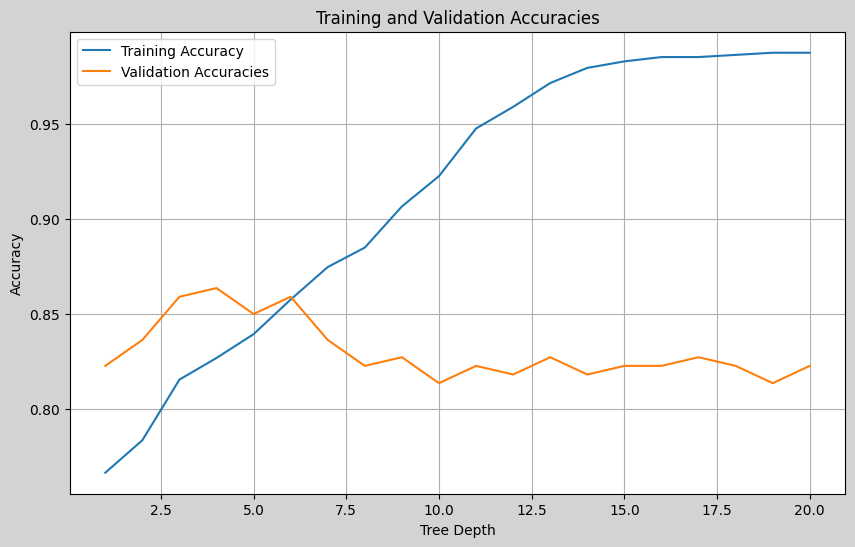

In [22]:
# Plotting the training and validation accuracies to visualize the effects
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, validation_accuracies, label='Validation Accuracies')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.grid(True, zorder=1)
plt.legend()
plt.show()

-> From both the data and the graph, it can be seen that the model tends to underfit in the beginning since both the training and validation curved are close to each other and at last, the model is overfitting since the training and the validation curves are at max distance. 

<li><b>Initial Phase (Underfitting):</b> In the early stages, both training and validation accuracies are low, indicating that the model might be underfitting. This is due to the fact that the depth of the decisison tree is low and model is too simple to capture the patterns in the training data. This can be seen in graph by both the curves being close to each other.</li>

<li><b>Mid Phase (Optimal Fit):</b> As the training accuracy improves, the validation accuracy also improves, reaching a peak at around 0.845. This indicates that the model is achieving a good balance between fitting the training data and generalizing to unseen data.</li> 

<li><b>Later Phase (Overfitting):</b> After reaching the peak, the validation accuracy begins to decline even though the training accuracy continues to increase. This suggests that the model starts to overfit the training data. This is due to the reason that the depth of the decision tree has increased such that it become too complex for the data and now it is also capturing the noise, result in overfitting.</li> 

<hr>

<br>
<h1>3. Calculating Precision, Recall, and F1-Score for Logistic Regression</h1>
<h3><b>Exercise:</b>  Implement logistic regression and calculate precision, recall, and F1-score for the model. <br>
<b>Tip:</b> Discuss how these metrics provide insights into model performance in  your week article.
</h3>

In [23]:
# Implementing the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

# Predicting the target variable
Y_pred = lr_model.predict(X_test)

In [24]:
# Calculating Precision score
print(f'Precision score of the model: {precision_score(Y_test, Y_pred) : .2f}')

# Calculating Recall score
print(f'Recall score of the model: {recall_score(Y_test, Y_pred) : .2f}')

# Calculating F1 score
print(f'F1 score of the model: {f1_score(Y_test, Y_pred) : .2f}')

Precision score of the model:  0.81
Recall score of the model:  0.90
F1 score of the model:  0.85


<li><b>Precision (0.80):</b> The precision of the model is simply the ratio of True Positives (TP) to the total number of positives predicted (True Positives TP + False Positives FP) by the model. In this case, model predicts 80% of the predicted positives correct, indicating good performance.</li>
<br>
<li><b>Recall (0.85):</b> The recall of the model is the ratio of True Positives (TP) to the total number of actual positives (True Positives TP + False Negatives FN) in the dataset. In this case, model predicts 85% of the actual positives as correct.</li>
<br>
<li><b>F1 score (0.83):</b> The F1 score of the model is the harmonic mean of the precision and recall scores. It is shows the balance between the precision and recall. F1 score of 83% suggests a good balance between precision and recall values, indicating that model performs well.</li>

<hr>

<br>
<h1>4. ROC Curve Analysis for Decision Trees</h1>
<h3><b>Exercise:</b> Implement a decision tree classifier and plot the ROC curve.<br>
Compute the AUC (Area Under the Curve) and interpret the results.</h3>

In [25]:
# Implementing Decision Tree Classifier model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

# Predicting the probabilities to compute the ROC curve
Y_pred_proba = dtc_model.predict_proba(X_test)[:, 1]

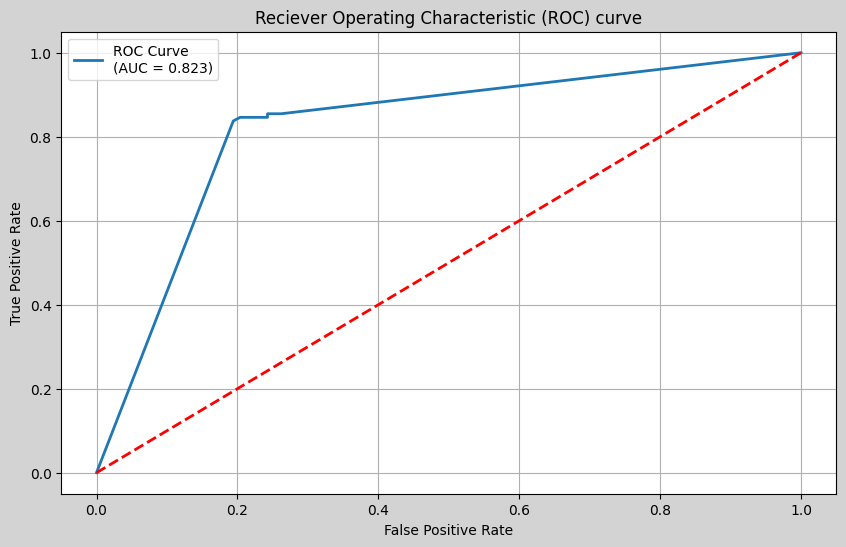

In [26]:
# Computing the fpr, tpr and thresholds for the ROC curve
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_proba)

# Computing the AUC score
auc = roc_auc_score(Y_test, Y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve\n(AUC = {auc:.3f})')   # The ROC curve with fpr on x-axis and tpr on y-axis
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')   # The reference 0.5 AUC line.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) curve')
plt.legend()
plt.grid(True, zorder=1)
plt.show()

In [27]:
# Printing the AUC of ROC curve
print(f'The AUC of ROC curve: {auc:.3f}')

The AUC of ROC curve: 0.823


-> The AUC value of 0.771 suggests that the model correctly guesses 77.1% of the predictions. The ROC curve is also well above the line of random guessing model (red dashed line) indicating the model performance is good.
<br><br>
-> The point where the ROC curve is close to the y-axis and far from the x-axis indicates that this threshold is best for this classification problem, since the TPR is higher than the FPR.

<hr>

<br>
<h1>5. Comparing Model Performance with and without Cross-Validation</h1>
<h3><b>Exercise:</b> Train logistic regression and decision tree models with and without cross-validation. <br>
Compare their performance metrics, including accuracy, precision, and recall.</h3>

In [31]:
# Training Logistic Regression without cross validation
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

Y_pred_lr = lr_model.predict(X_test)

# Performance metrics for non-cross validated Log-Reg model
print('Performance Metrics for Non-cross validated Logistic Regression Model:')
print(f'Accuracy: {accuracy_score(Y_test, Y_pred_lr):.3f}')
print(f'Precision: {precision_score(Y_test, Y_pred_lr):.3f}')
print(f'Recall: {recall_score(Y_test, Y_pred_lr):.3f}')

Performance Metrics for Non-cross validated Logistic Regression Model:
Accuracy: 0.832
Precision: 0.808
Recall: 0.897


In [38]:
# Training Logistic Regression with Cross Validation (10 folds)
# Calculating cross validation accuracy
lr_cv_scores = cross_val_score(LogisticRegression(), X, Y, cv=10, scoring='accuracy')
lr_cv_accuracy = lr_cv_scores.mean()

# Calculating cross validation precision
lr_cv_scores = cross_val_score(LogisticRegression(), X, Y, cv=10, scoring='precision')
lr_cv_precision = lr_cv_scores.mean()

# Calculating cross validation recall
lr_cv_scores = cross_val_score(LogisticRegression(), X, Y, cv=10, scoring='recall')
lr_cv_recall = lr_cv_scores.mean()

# Performance metrics for cross validated Log-Reg model
print('Performance Metrics for Cross Validated Logistic Regression Model:')
print(f'Accuracy: {lr_cv_accuracy:.3f}')
print(f'Precision: {lr_cv_precision:.3f}')
print(f'Recall: {lr_cv_recall:.3f}')

Performance Metrics for Cross Validated Logistic Regression Model:
Accuracy: 0.790
Precision: 0.801
Recall: 0.771


-> The <b>non-cross-validated logistic regression model</b> achieves higher accuracy (0.832) and recall (0.897), indicating it is more effective at identifying positive cases but potentially overfitting to the training data. Its precision (0.808) is slightly lower, suggesting more false positives. <br>
In contrast, the <b>cross-validated logistic regression model</b> has lower accuracy (0.790) and recall (0.771) but maintains a similar precision (0.801). This implies that while it may miss more positive cases, it is more likely to generalize well to new data. <br>
<p>--------------------------------------------------------------------------------------------------------------------------------</p>

In [36]:
# Training Decision Tree Classifier without cross validation
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

Y_pred_dtc = dtc_model.predict(X_test)

# Performance metrics for non-cross validated Decision Tree model
print('Performance Metrics for Non-cross validated Decision Tree Classifier Model:')
print(f'Accuracy: {accuracy_score(Y_test, Y_pred_dtc):.3f}')
print(f'Precision: {precision_score(Y_test, Y_pred_dtc):.3f}')
print(f'Recall: {recall_score(Y_test, Y_pred_dtc):.3f}')

Performance Metrics for Non-cross validated Decision Tree Classifier Model:
Accuracy: 0.818
Precision: 0.818
Recall: 0.846


In [66]:
# Training Decision Tree Classifier with Cross Validation (10 folds)
# Calculating cross validation accuracy
dtc_cv_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='accuracy')
dtc_cv_accuracy = dtc_cv_scores.mean()

# Calculating cross validation precision
dtc_cv_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='precision')
dtc_cv_precision = dtc_cv_scores.mean()

# Calculating cross validation recall
dtc_cv_scores = cross_val_score(DecisionTreeClassifier(), X, Y, cv=10, scoring='recall')
dtc_cv_recall = dtc_cv_scores.mean()

# Performance metrics for cross validated Decision Tree model
print('Performance Metrics for Cross Validated Decision Tree Classifier Model:')
print(f'Accuracy: {dtc_cv_accuracy:.3f}')
print(f'Precision: {dtc_cv_precision:.3f}')
print(f'Recall: {dtc_cv_recall:.3f}')

Performance Metrics for Cross Validated Decision Tree Classifier Model:
Accuracy: 0.821
Precision: 0.823
Recall: 0.816


-> The <b>non-cross-validated decision tree classifier</b> achieves an accuracy of 0.818, precision of 0.818, and recall of 0.846, indicating good performance but with a higher tendency to identify positive cases (higher recall). <br> 
The <b>cross-validated decision tree classifier</b> shows slightly improved accuracy (0.821) and precision (0.823), but a lower recall (0.816), suggesting a more balanced and generalizable model. While the differences are minor, the cross-validated model is likely more reliable for unseen data due to its slight improvement in accuracy and precision, indicating better generalization and reduced overfitting.

<hr>